<a href="https://colab.research.google.com/github/iamsayantan20/Tile-plot-of-measles-rate-by-year-and-state/blob/master/Customer_Churn_Prediction_Sayantan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Mount Google Drive in Colab

In [42]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2: Load the dataset from My Drive

In [43]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/DataScienceProjects/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Show the first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Step 3: Understand the Data – Basic Info

In [44]:
# Basic info about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# View the shape (rows, columns)
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(7043, 21)

Step 4: Clean the Data

Our goal here is to understand which columns are:

Numerical vs Categorical
Clean vs Dirty (missing or inconsistent)

In [45]:
# 1. Drop customerID
df.drop('customerID', axis=1, inplace=True)

# 2. Convert TotalCharges to numeric (errors='coerce' turns bad values into NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Drop rows with missing TotalCharges
df.dropna(inplace=True)

# 4. Confirm no more missing data
print("Missing values:\n", df.isnull().sum())
print("New shape:", df.shape)


Missing values:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
New shape: (7032, 20)


Step 5: Exploratory Data Analysis (EDA) — Visualize the Story

We’ll now generate visual insights to:

Understand key churn factors

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Set style
sns.set(style="whitegrid")


 Plot 1: Churn Distribution

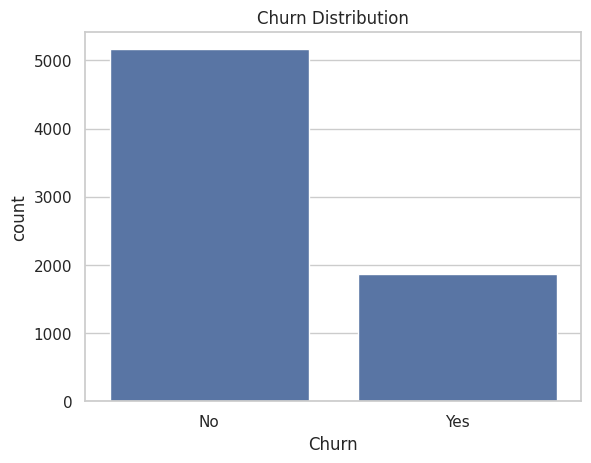

In [47]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


Plot 2: Churn by Contract Type

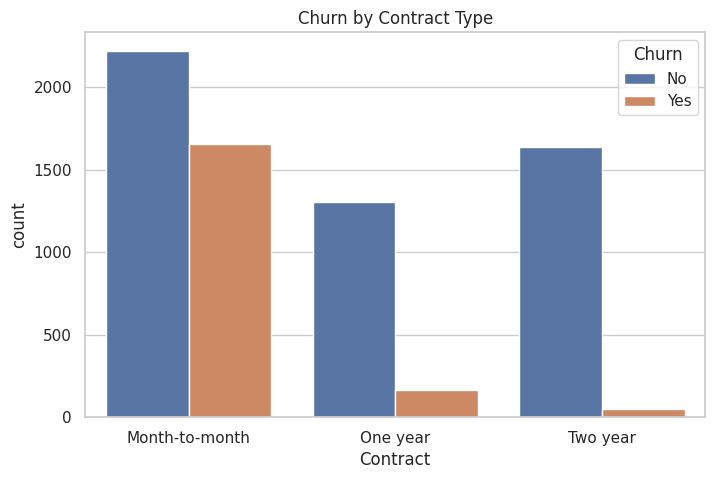

In [48]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()


Plot 3: Monthly Charges vs. Churn

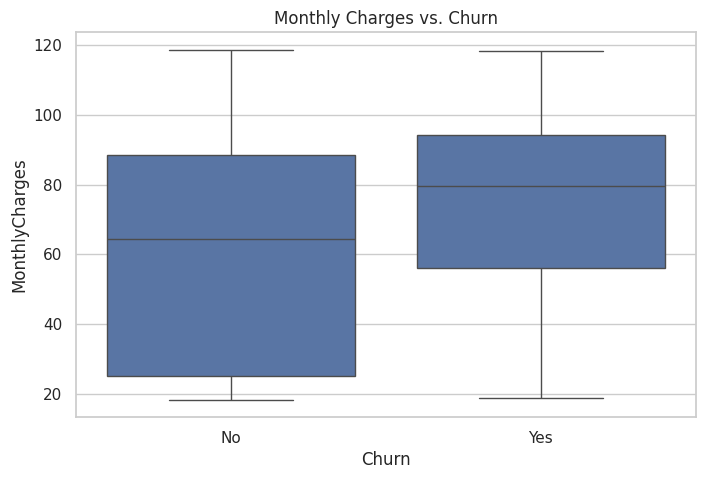

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs. Churn")
plt.show()


Plot 4: Correlation Heatmap (Numerical)

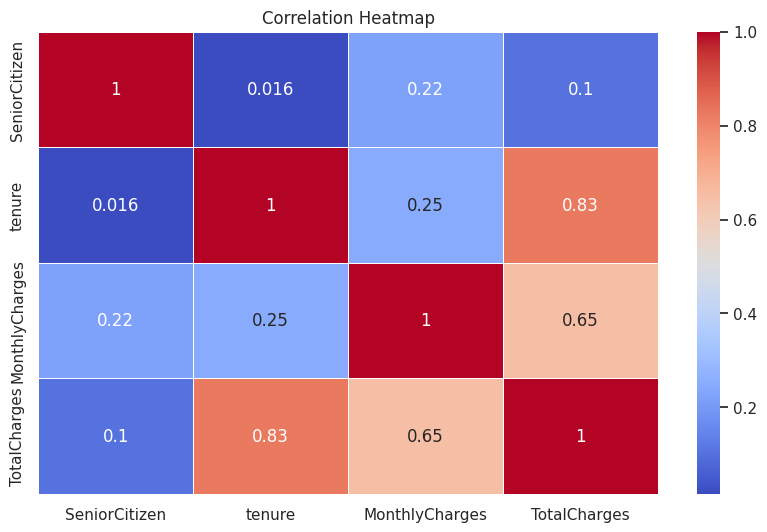

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Step 6: Build & Evaluate a Logistic Regression Model

Step 6.1: Encode Categorical Variables
Most of your features are still categorical (object type). We'll convert them using get_dummies():

In [51]:
# Convert 'Yes'/'No' to binary 1/0 where possible and use get_dummies for the rest
df_encoded = pd.get_dummies(df, drop_first=True)

# Check shape and preview
print("New shape:", df_encoded.shape)
df_encoded.head()


New shape: (7032, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


Step 6.2: Split Data into Train/Test Sets

In [52]:
from sklearn.model_selection import train_test_split

# Separate features and label
X = df_encoded.drop('Churn_Yes', axis=1)  # target column is now 'Churn_Yes'
y = df_encoded['Churn_Yes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (5625, 30)
Test size: (1407, 30)


Step 6.3: Train Logistic Regression Model

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.7874911158493249

Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix:
 [[915 118]
 [181 193]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
